In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import inspect
import matplotlib as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import sympy as sym

In [2]:
repo_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_url = repo_url + 'time_series_covid19_confirmed_global.csv'
deaths_url = repo_url + 'time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30,33,36,36,40,42,43,47,50,57
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,26,27,27,27,27,28,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,375,384,392,402,407,415,419,425,432
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,35,36,37,37,37,37,40,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,129,132,136,147,152,165,176,185,192,197


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.index = pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index = pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
def completeWithMean(column):
    return (column.shift() + column.shift(-1)) / 2

duplicated = data_argentina_confirmed.duplicated('Total')
data_argentina_confirmed.loc[duplicated, ['Total']] = np.NaN

data_argentina_confirmed.Total = np.where(data_argentina_confirmed['Total'].isnull(),
         completeWithMean(data_argentina_confirmed['Total']),
         data_argentina_confirmed['Total'])

data_argentina_confirmed.fillna(method='pad', inplace=True)
data_argentina_confirmed.Total = data_argentina_confirmed.Total.round().astype(int)

In [20]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0).astype(int)

In [21]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [22]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [23]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths
                          , left_index=True, right_index=True
                          , suffixes=('ConfirmedCases', 'DeathCases'))

In [24]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
2020-03-06,2,1,0,0
2020-03-07,8,6,0,0
2020-03-08,12,4,1,1
2020-03-09,14,2,1,0
2020-03-10,17,3,1,0


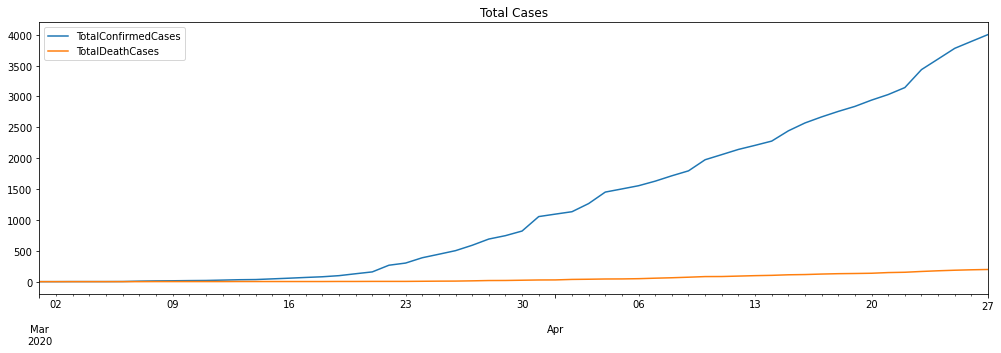

In [25]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

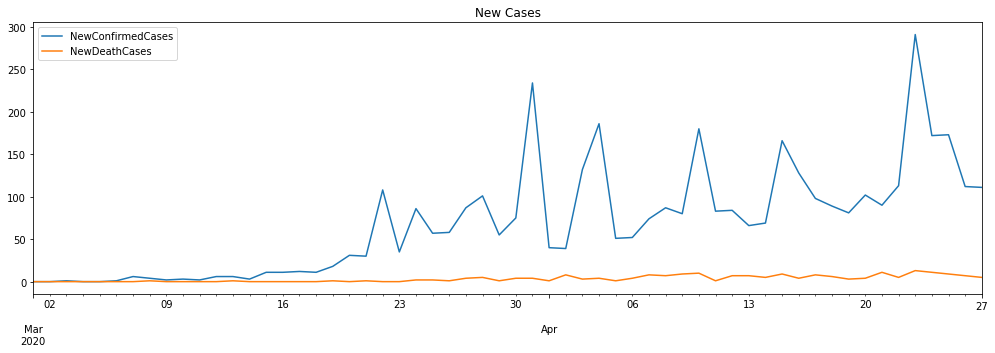

In [26]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [27]:
data_argentina_confirmed

Date,Total,New
2020-03-01,0,0
2020-03-02,0,0
2020-03-03,1,1
2020-03-04,1,0
2020-03-05,1,0
2020-03-06,2,1
2020-03-07,8,6
2020-03-08,12,4
2020-03-09,14,2
2020-03-10,17,3


In [28]:
data_argentina['num_id'] = np.arange(len(data_argentina) + 1)[1:]
data_argentina = data_argentina.head(45)
data_argentina.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-01,0,0,0,0,1
2020-03-02,0,0,0,0,2
2020-03-03,1,1,0,0,3
2020-03-04,1,0,0,0,4
2020-03-05,1,0,0,0,5


In [29]:
data_argentina.tail()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-04-10,1975,180,82,10,41
2020-04-11,2058,83,83,1,42
2020-04-12,2142,84,90,7,43
2020-04-13,2208,66,97,7,44
2020-04-14,2277,69,102,5,45


In [30]:
predicted_days = 30
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [31]:
# testing only (remove last row to check results)
#data_argentina.drop(data_argentina.tail(1).index,inplace=True)

In [32]:
class Models:    
    def cuadratic_model(x, a, b, c):
        return (a*x**2 + b*x +c)

    def cubic_model(x, a, b, c, d):
        return (a*x**3 + b*x**2 +c*x + d)
    
    def fourth_pow_model(x, a, b, c, d, e):
        return (a*x**4 + b*x**3 +c*x**2 + d*x + e)
    
    def fiveth_pow_model(x, a, b, c, d, e, f):
        return (a*x**5 + b*x**4 +c*x**3 + d*x**2 + e*x + f)
    
    def sixh_pow_model(x, a, b, c, d, e, f, g):
        return (a*x**6 + b*x**5 +c*x**4 + d*x**3 + e*x**2 + f*x + g)
    
    def exp_model(x, c, k):
        return c * np.exp(k * x)

In [33]:
def formatPrediction(firstPredictionDay, day, prediction):
    formatedDate = str(firstPredictionDay + datetime.timedelta(days = day))[0:10]
    formatedPrediction = str(int(prediction))
    return "|" + formatedDate + " | " + formatedPrediction + "|"

def printPrediction(model, popt, x, y):
    firstPredictionDayId = x.max() + 1
    print("--- Predictions ---")
    for day in range (0, predicted_days):
        predictionId = firstPredictionDayId + day
        predictionValue = model(predictionId, *popt)
        print(formatPrediction(firstPredictionDay, day, predictionValue))
    print("-------------------")

In [34]:
def printFuncionParameters(model, popt):
        print('\n', model.__name__)
        args = inspect.getfullargspec(model).args[1:]
        for arg, value in zip(args, popt):
            print( arg, " = ", value)

def plotPrediction(model, popt, x, y):
    plt.pyplot.figure()
    try:
        xs = sym.Symbol('\lambda')    
        tex = sym.latex(model(xs,*popt)).replace('$', '')
        plt.pyplot.title(r'$f(\lambda)= %s$' %(tex),fontsize=12)
    except:
        printFuncionParameters(model, popt)

    plt.pyplot.plot(x, model(x, *popt))
    plt.pyplot.plot(x, y, 'ro')
    plt.pyplot.show()

In [35]:
def predictData(model, x, y):
    popt, _ = curve_fit(model, x, y)
    printPrediction(model, popt, x, y)
    plotPrediction(model, popt, x, y)
    return popt

cuadratic_model
--- Predictions ---
|2020-04-15 | 2574|
|2020-04-16 | 2713|
|2020-04-17 | 2855|
|2020-04-18 | 3001|
|2020-04-19 | 3151|
|2020-04-20 | 3304|
|2020-04-21 | 3461|
|2020-04-22 | 3622|
|2020-04-23 | 3786|
|2020-04-24 | 3954|
|2020-04-25 | 4125|
|2020-04-26 | 4300|
|2020-04-27 | 4479|
|2020-04-28 | 4661|
|2020-04-29 | 4847|
|2020-04-30 | 5036|
|2020-05-01 | 5229|
|2020-05-02 | 5426|
|2020-05-03 | 5626|
|2020-05-04 | 5830|
|2020-05-05 | 6037|
|2020-05-06 | 6248|
|2020-05-07 | 6462|
|2020-05-08 | 6681|
|2020-05-09 | 6902|
|2020-05-10 | 7128|
|2020-05-11 | 7357|
|2020-05-12 | 7589|
|2020-05-13 | 7826|
|2020-05-14 | 8065|
-------------------


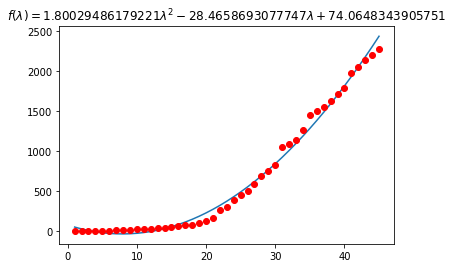

cubic_model
--- Predictions ---
|2020-04-15 | 2498|
|2020-04-16 | 2618|
|2020-04-17 | 2739|
|2020-04-18 | 2861|
|2020-04-19 | 2984|
|2020-04-20 | 3109|
|2020-04-21 | 3235|
|2020-04-22 | 3362|
|2020-04-23 | 3491|
|2020-04-24 | 3620|
|2020-04-25 | 3749|
|2020-04-26 | 3880|
|2020-04-27 | 4011|
|2020-04-28 | 4143|
|2020-04-29 | 4275|
|2020-04-30 | 4408|
|2020-05-01 | 4541|
|2020-05-02 | 4674|
|2020-05-03 | 4807|
|2020-05-04 | 4940|
|2020-05-05 | 5074|
|2020-05-06 | 5207|
|2020-05-07 | 5340|
|2020-05-08 | 5472|
|2020-05-09 | 5604|
|2020-05-10 | 5736|
|2020-05-11 | 5867|
|2020-05-12 | 5997|
|2020-05-13 | 6127|
|2020-05-14 | 6256|
-------------------


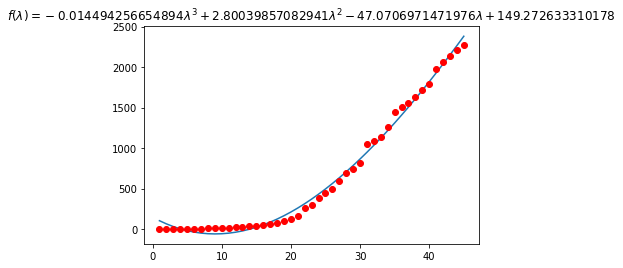

exp_model
--- Predictions ---
|2020-04-15 | 2857|
|2020-04-16 | 3104|
|2020-04-17 | 3371|
|2020-04-18 | 3662|
|2020-04-19 | 3978|
|2020-04-20 | 4321|
|2020-04-21 | 4694|
|2020-04-22 | 5099|
|2020-04-23 | 5539|
|2020-04-24 | 6016|
|2020-04-25 | 6535|
|2020-04-26 | 7099|
|2020-04-27 | 7711|
|2020-04-28 | 8377|
|2020-04-29 | 9099|
|2020-04-30 | 9884|
|2020-05-01 | 10736|
|2020-05-02 | 11662|
|2020-05-03 | 12668|
|2020-05-04 | 13761|
|2020-05-05 | 14948|
|2020-05-06 | 16237|
|2020-05-07 | 17637|
|2020-05-08 | 19159|
|2020-05-09 | 20811|
|2020-05-10 | 22606|
|2020-05-11 | 24556|
|2020-05-12 | 26674|
|2020-05-13 | 28974|
|2020-05-14 | 31473|
-------------------

 exp_model
c  =  63.57686148057252
k  =  0.08272878360491286


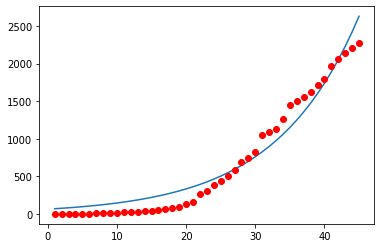

fiveth_pow_model
--- Predictions ---
|2020-04-15 | 2333|
|2020-04-16 | 2386|
|2020-04-17 | 2430|
|2020-04-18 | 2464|
|2020-04-19 | 2486|
|2020-04-20 | 2497|
|2020-04-21 | 2496|
|2020-04-22 | 2481|
|2020-04-23 | 2453|
|2020-04-24 | 2410|
|2020-04-25 | 2352|
|2020-04-26 | 2278|
|2020-04-27 | 2187|
|2020-04-28 | 2080|
|2020-04-29 | 1956|
|2020-04-30 | 1814|
|2020-05-01 | 1654|
|2020-05-02 | 1475|
|2020-05-03 | 1278|
|2020-05-04 | 1062|
|2020-05-05 | 826|
|2020-05-06 | 572|
|2020-05-07 | 299|
|2020-05-08 | 6|
|2020-05-09 | -304|
|2020-05-10 | -634|
|2020-05-11 | -982|
|2020-05-12 | -1348|
|2020-05-13 | -1732|
|2020-05-14 | -2133|
-------------------


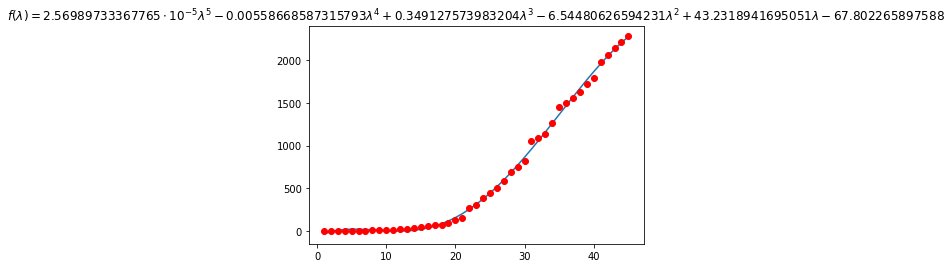

fourth_pow_model
--- Predictions ---
|2020-04-15 | 2307|
|2020-04-16 | 2343|
|2020-04-17 | 2365|
|2020-04-18 | 2371|
|2020-04-19 | 2359|
|2020-04-20 | 2328|
|2020-04-21 | 2275|
|2020-04-22 | 2199|
|2020-04-23 | 2098|
|2020-04-24 | 1970|
|2020-04-25 | 1812|
|2020-04-26 | 1623|
|2020-04-27 | 1401|
|2020-04-28 | 1142|
|2020-04-29 | 846|
|2020-04-30 | 509|
|2020-05-01 | 129|
|2020-05-02 | -296|
|2020-05-03 | -770|
|2020-05-04 | -1294|
|2020-05-05 | -1872|
|2020-05-06 | -2506|
|2020-05-07 | -3200|
|2020-05-08 | -3955|
|2020-05-09 | -4775|
|2020-05-10 | -5664|
|2020-05-11 | -6623|
|2020-05-12 | -7656|
|2020-05-13 | -8767|
|2020-05-14 | -9959|
-------------------


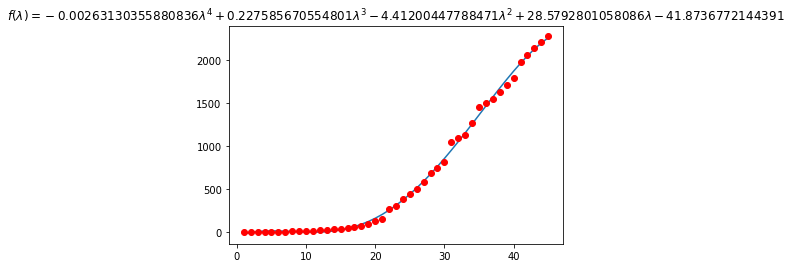

sixh_pow_model
--- Predictions ---
|2020-04-15 | 2416|
|2020-04-16 | 2545|
|2020-04-17 | 2697|
|2020-04-18 | 2879|
|2020-04-19 | 3099|
|2020-04-20 | 3368|
|2020-04-21 | 3697|
|2020-04-22 | 4098|
|2020-04-23 | 4587|
|2020-04-24 | 5180|
|2020-04-25 | 5896|
|2020-04-26 | 6754|
|2020-04-27 | 7778|
|2020-04-28 | 8993|
|2020-04-29 | 10428|
|2020-04-30 | 12111|
|2020-05-01 | 14078|
|2020-05-02 | 16364|
|2020-05-03 | 19009|
|2020-05-04 | 22055|
|2020-05-05 | 25550|
|2020-05-06 | 29544|
|2020-05-07 | 34091|
|2020-05-08 | 39248|
|2020-05-09 | 45079|
|2020-05-10 | 51651|
|2020-05-11 | 59035|
|2020-05-12 | 67309|
|2020-05-13 | 76552|
|2020-05-14 | 86854|
-------------------


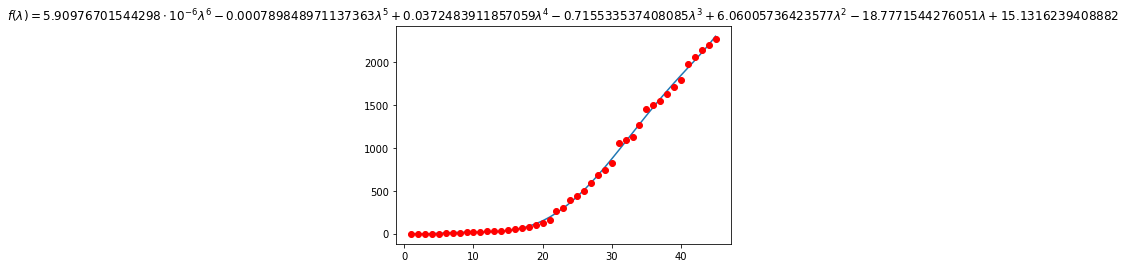

In [36]:
def isModel(methodName):
    return not(methodName.startswith('__'))

for methodName in dir(Models):
    if(isModel(methodName)):
        print(methodName)
        predictData(getattr(Models, methodName), data_argentina.num_id, data_argentina.TotalConfirmedCases)

In [37]:
def cuadratic_negative_model(x, a, b, c):
    return (-1 * (a**2) * x**2 + b*x +c)

In [37]:
data_argentina_filtered = data_argentina[data_argentina['num_id'] >=20]
data_argentina_filtered['num_id'] = np.arange(len(data_argentina_filtered) + 1)[1:]
data_argentina_filtered.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-20,128,31,3,0,1
2020-03-21,158,30,4,1,2
2020-03-22,266,108,4,0,3
2020-03-23,301,35,4,0,4
2020-03-24,387,86,6,2,5


--- Predictions ---
|2020-04-15 | 2355|
|2020-04-16 | 2422|
|2020-04-17 | 2484|
|2020-04-18 | 2539|
|2020-04-19 | 2588|
|2020-04-20 | 2629|
|2020-04-21 | 2662|
|2020-04-22 | 2688|
|2020-04-23 | 2705|
|2020-04-24 | 2712|
|2020-04-25 | 2710|
|2020-04-26 | 2698|
|2020-04-27 | 2675|
|2020-04-28 | 2641|
|2020-04-29 | 2595|
|2020-04-30 | 2538|
|2020-05-01 | 2468|
|2020-05-02 | 2385|
|2020-05-03 | 2288|
|2020-05-04 | 2178|
|2020-05-05 | 2053|
|2020-05-06 | 1914|
|2020-05-07 | 1759|
|2020-05-08 | 1588|
|2020-05-09 | 1400|
|2020-05-10 | 1196|
|2020-05-11 | 975|
|2020-05-12 | 736|
|2020-05-13 | 478|
|2020-05-14 | 202|
-------------------


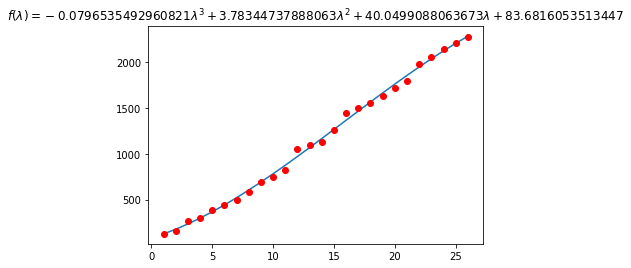

In [38]:
coff = predictData(Models.cubic_model, data_argentina_filtered.num_id, data_argentina_filtered.TotalConfirmedCases)

In [39]:
coff

array([-7.96535493e-02,  3.78344738e+00,  4.00499088e+01,  8.36816054e+01])

In [40]:
x = range(1,365)

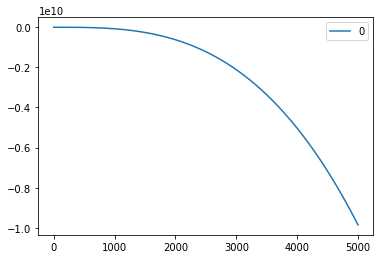

In [41]:
pd.DataFrame([(int(Models.cubic_model(x, *coff))) for x in range(1,5000)]).plot()